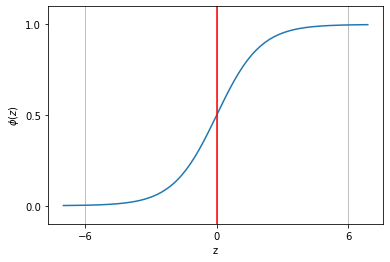

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color="r")
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
plt.xticks([-6,0,6])
ax = plt.gca()
ax.xaxis.grid(True)


In [33]:
class LogisticRegression:
    """Logistic Regression Classifier using gradient descent.
       Parameters
       ------------
       eta : float
         Learning rate (between 0.0 and 1.0)
       n_iter : int
         Passes over the training dataset.
       random_state : int
         Random number generator seed for random weight
         initialization.
       Attributes
       -----------
       w_ : 1d-array
         Weights after fitting.
       cost_ : list
       Sum-of-squares cost function value in each epoch.
"""
    def __init__(self, eta=0.01,n_iter = 100, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state = random_state
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale =0.01,size=1+X.shape[1])
        self.cost_=[]
        
        for i in range (self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    def net_input(self, X ):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def activation(self, z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,0)
    
    

In [40]:
def plot_decision_regions(X,y, classifier,resolution = 0.01):
    # set up the colormap;
    markers = ('s','x','o','*','^','>')
    colors = ('red','blue','green','yellow','blue','gray')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max =X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max =X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z =Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.5,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                   y=X[y==cl,1],
                   alpha =1,
                   c =colors[idx],
                   marker =markers[idx],
                   label =cl,
                    s=10,
                   edgecolor ='black')

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
X_full = iris.data[:,[2,3]]
y_full = iris.target

X = iris.data[:100,[2,3]]
y = iris.target[:100]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
print('lable counts in y:',np.bincount(y))
print('lable counts in y train:',np.bincount(y_train))

lable counts in y: [50 50]
lable counts in y train: [35 35]


In [35]:
X_full_train,X_full_test,y_full_train,y_full_test = train_test_split(X_full,y_full,test_size=0.3,random_state=1,stratify=y_full)

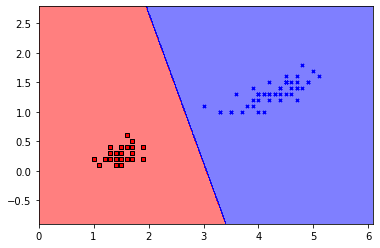

[1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0]
[1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0]
 the accuracy score is 1.00


In [50]:
log = LogisticRegression()
log = log.fit(X_train,y_train)
plot_decision_regions(X,y,classifier=log)
plt.show()
print(log.predict(X_test))
print(y_test)
from sklearn.metrics import accuracy_score
print(" the accuracy score is %.2f"%accuracy_score(log.predict(X_test),y_test))

In [37]:
#print(log.w_)
output = log.activation(log.net_input(X))
#print(output)
#print(output.shape)
errors = y-output
print(errors)
test = X.T.dot(errors)
print(test)



[-0.07947458 -0.07947458 -0.0703536  -0.089664   -0.07947458 -0.15967613
 -0.09511527 -0.089664   -0.07947458 -0.07484558 -0.089664   -0.10101645
 -0.06621763 -0.04558214 -0.06220865 -0.12739774 -0.10086122 -0.09511527
 -0.135003   -0.10707672 -0.11362684 -0.12739774 -0.04849615 -0.1878791
 -0.14298787 -0.10101645 -0.14277839 -0.089664   -0.07947458 -0.10101645
 -0.10101645 -0.12739774 -0.07484558 -0.07947458 -0.089664   -0.06220865
 -0.0703536  -0.06621763 -0.0703536  -0.089664   -0.08436377 -0.08436377
 -0.0703536  -0.19800275 -0.19827451 -0.09511527 -0.10101645 -0.07947458
 -0.089664   -0.07947458  0.01392367  0.01487031  0.00883238  0.04144686
  0.01305853  0.02188495  0.00943619  0.16406282  0.0192352   0.03893909
  0.13103595  0.0219216   0.07238316  0.01392367  0.06824531  0.02053543
  0.01487031  0.06401943  0.01487031  0.06813662  0.00560172  0.04144686
  0.00883238  0.02050106  0.02829679  0.02053543  0.01222579  0.00524198
  0.01487031  0.13103595  0.07699399  0.10383178  0.

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
X_full_train_std = sc.fit_transform(X_full_train)
X_full_test_std = sc.fit_transform(X_full_test)
lr.fit(X_train_std,y_train)
#print(X_train)
print(y_train)
predicted = lr.predict(X_test_std)
print("the accuracy score is %.2f:"%accuracy_score(predicted,y_test))
#print(y_test)

[0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0]
the accuracy score is 1.00:


In [39]:
print(lr.predict_proba(X_test_std[:3,:]).argmax(axis=1))

lr.predict(X_test_std[:3,:])

[1 1 0]


array([1, 1, 0])

In [45]:
for i in enumerate(np.unique(y_full_train)):
   
   print(i) 


(10, 0)
(11, 1)
(12, 2)


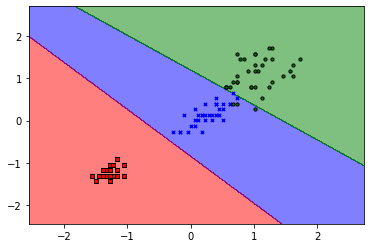

[2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
the accuracy_score is: 0.98


In [30]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=0.0001,random_state=1)
svm.fit(X_full_train_std,y_full_train)
plot_decision_regions(X_full_train_std,y_full_train,classifier=svm)
plt.show()
svm_prediction=svm.predict(X_full_test_std)
print(svm_prediction)
print(y_full_test)
print('the accuracy_score is: %.2f'%accuracy_score(svm_prediction,y_full_test))